In [16]:
import pyedflib
import numpy as np
from scipy import signal,stats
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [17]:
def import_data(filename):
    f = pyedflib.EdfReader(filename)
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    signal_labels = [sl.replace('.','') for sl in signal_labels]
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
    return sigbufs, signal_labels

In [18]:
eyes_open, olabels = import_data('D:/DataScience/BI/HW03/S059R01.edf')
eyes_closed, clabels  = import_data('D:/DataScience/BI/HW03/S059R02.edf')
t = np.arange(0,61,1/160)

In [19]:
eyes_open.shape

(64, 9760)

In [20]:
s = ''
for l in olabels[-9:-1]: s+= l+' '
print(s)

Po7 Po3 Poz Po4 Po8 O1 Oz O2 


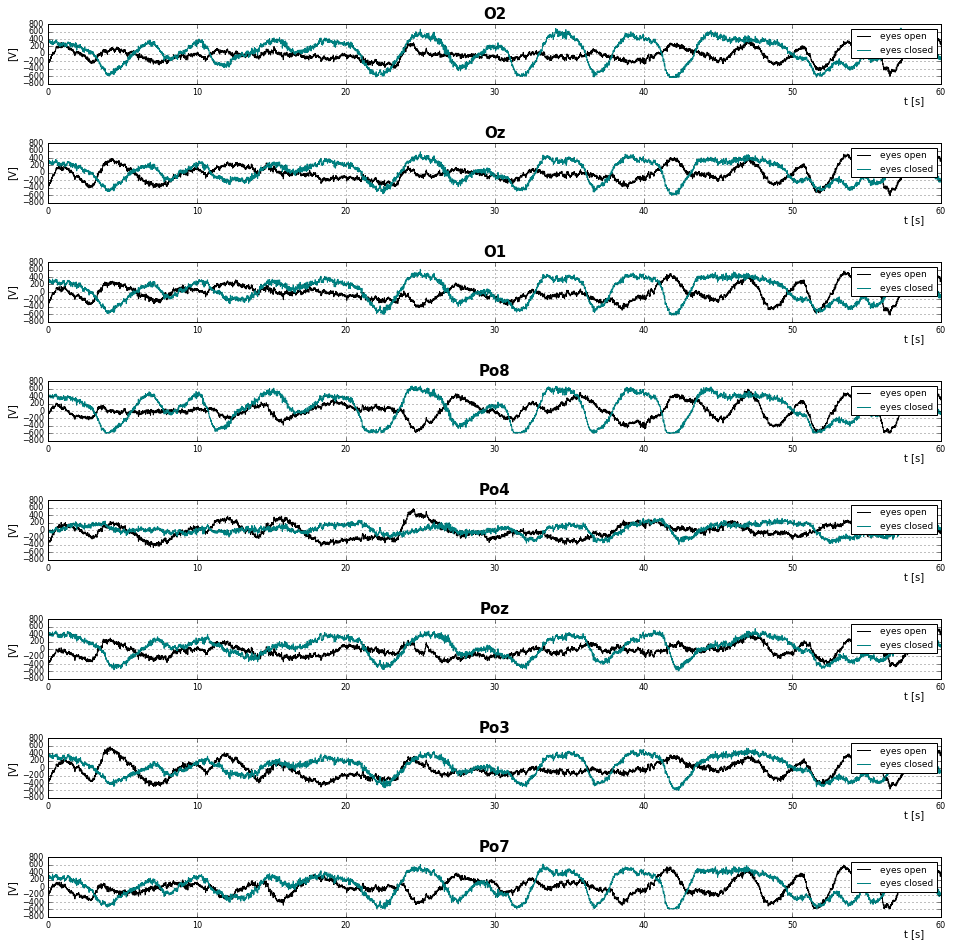

In [21]:
plt.figure(figsize=(16, 16))
n = 8
for i in range(n):
    idx = i+1
    plt.subplot(n*100+10+idx)
    plt.subplots_adjust(hspace=1)
    plt.plot(t, np.transpose(eyes_open[-idx-1]), color = (0,0,0,1), linewidth = 1)
    plt.plot(t, np.transpose(eyes_closed[-idx-1]), color = (0,.5,.5,1), linewidth = 1)
    # legend
    eo = mlines.Line2D([], [], color= (0,0,0,1), marker='_', markersize=0, label='eyes open')
    ec = mlines.Line2D([], [], color= (0,.5,.5,1), marker='_', markersize=0, label='eyes closed')
    plt.legend(handles=[eo, ec], prop={'size': 9})
    
    plt.xlim(0,60)
    plt.ylim(-800,800)
    
    plt.xlabel('t [s]')
    plt.ylabel('[V]')
    ax = plt.gca() 
    ax.xaxis.set_label_coords(.97, -0.2) 
    ax.xaxis.labelpad = 0
    plt.tick_params(labelsize=8)
    plt.title(olabels[-idx-1], fontsize=15, fontweight='bold')
    plt.grid()

plt.savefig('D:/DataScience/BI/HW03/1-temp.png')
plt.show()

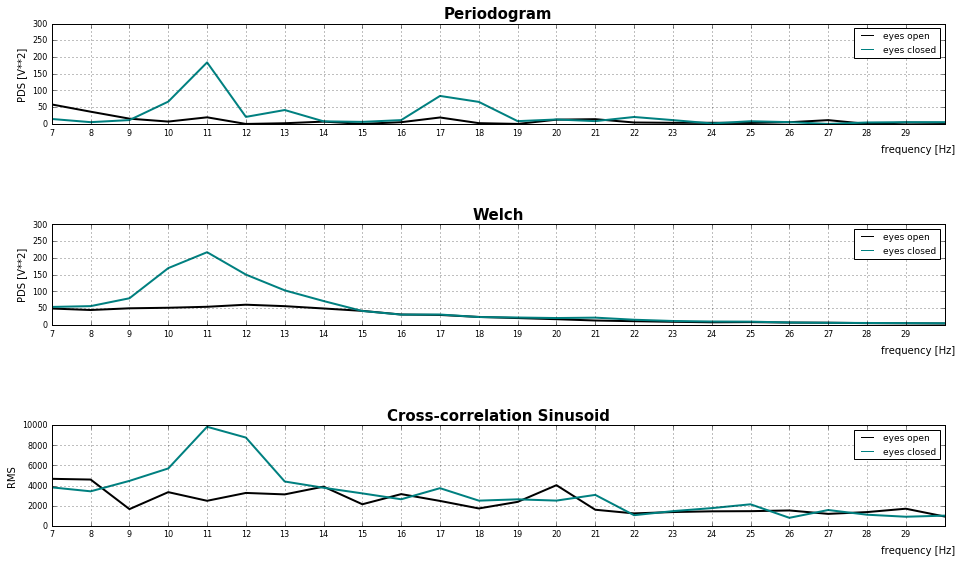

In [22]:
# figura report
plt.figure(figsize=(16, 9))

# periodogram
plt.subplot(311)
plt.subplots_adjust(hspace=1)
f1,Pxx_den1 = signal.periodogram(eyes_open[-2], 160,'hamming', 160, scaling = 'spectrum', axis = 0)
plt.plot(f1, np.transpose(Pxx_den1), color = (0,0,0,1), linewidth = 2)
f2,Pxx_den2 = signal.periodogram(eyes_closed[-2], 160,'hamming', 160, scaling = 'spectrum', axis = 0)
plt.plot(f2, np.transpose(Pxx_den2), color = (0,.5,.5,1), linewidth = 2)
# legend
eo = mlines.Line2D([], [], color= (0,0,0,1), marker='_', markersize=0, label='eyes open')
ec = mlines.Line2D([], [], color= (0,.5,.5,1), marker='_', markersize=0, label='eyes closed')
plt.legend(handles=[eo, ec], prop={'size': 9})

plt.ylabel('PDS [V**2]')
plt.xlim(7,30)
plt.ylim(0,300)
plt.xlabel('frequency [Hz]')
ax = plt.gca() 
ax.xaxis.set_label_coords(.97, -0.2) 
ax.xaxis.labelpad = 0
plt.xticks(list(range(7,30)))
plt.tick_params(labelsize=8)
plt.title('Periodogram', fontsize=15, fontweight='bold')
plt.grid()

# welch
plt.subplot(312)
plt.subplots_adjust(hspace=1)
f1,Pxx_den1 = signal.welch(eyes_open[-2], 160, 'hamming', 160, scaling = 'spectrum', axis = 0)
plt.plot(f1, np.transpose(Pxx_den1), color = (0,0,0,1), linewidth = 2)
f2,Pxx_den2 = signal.welch(eyes_closed[-2], 160,'hamming', 160, scaling = 'spectrum', axis = 0)
plt.plot(f2, np.transpose(Pxx_den2), color = (0,.5,.5,1), linewidth = 2)
# legend
eo = mlines.Line2D([], [], color= (0,0,0,1), marker='_', markersize=0, label='eyes open')
ec = mlines.Line2D([], [], color= (0,.5,.5,1), marker='_', markersize=0, label='eyes closed')
plt.legend(handles=[eo, ec], prop={'size': 9})

plt.ylabel('PDS [V**2]')
plt.xlim(7,30)
plt.ylim(0,300)
plt.xlabel('frequency [Hz]')
ax = plt.gca() 
ax.xaxis.set_label_coords(.97, -0.2) 
ax.xaxis.labelpad = 0
plt.xticks(list(range(7,30)))
plt.tick_params(labelsize=8)
plt.title('Welch', fontsize=15, fontweight='bold')
plt.grid()

# correlation
orms = []
crms = []
freqs = list(range(7,31))
for freq in freqs:
    basis_signal = np.cos(2*np.pi*freq*t)
    ocorr = signal.correlate(eyes_open[-2], basis_signal)
    orms += [np.sqrt(sum(ocorr**2) / len(t))]
    ccorr = signal.correlate(eyes_closed[-2], basis_signal)
    crms += [np.sqrt(sum(ccorr**2) / len(t))]
plt.subplot(313)
plt.subplots_adjust(hspace=1)
plt.plot(freqs, orms, color = (0,0,0,1), linewidth = 2)
plt.plot(freqs, crms, color = (0,.5,.5,1), linewidth = 2)
# legend
eo = mlines.Line2D([], [], color= (0,0,0,1), marker='_', markersize=0, label='eyes open')
ec = mlines.Line2D([], [], color= (0,.5,.5,1), marker='_', markersize=0, label='eyes closed')
plt.legend(handles=[eo, ec], prop={'size': 9})

plt.ylabel('RMS')
plt.xlim(7,30)
plt.ylim(0,10000)
plt.xlabel('frequency [Hz]')
ax = plt.gca() 
ax.xaxis.set_label_coords(.97, -0.2) 
ax.xaxis.labelpad = 0
plt.xticks(list(range(7,30)))
plt.tick_params(labelsize=8)
plt.title('Cross-correlation Sinusoid', fontsize=15, fontweight='bold')
plt.grid()



plt.savefig('D:/DataScience/BI/HW03/1-spectral_comparison.eps')
plt.show()

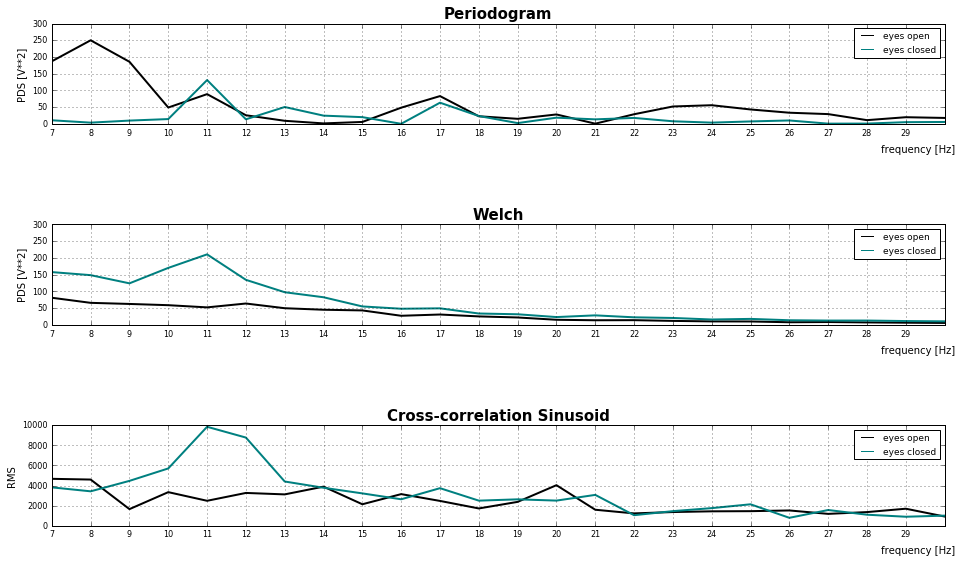

In [23]:
# window rectangular
plt.figure(figsize=(16, 9))

# periodogram
plt.subplot(311)
plt.subplots_adjust(hspace=1)
f1,Pxx_den1 = signal.periodogram(eyes_open[-2], 160,'rectangular', 160, scaling = 'spectrum', axis = 0)
plt.plot(f1, np.transpose(Pxx_den1), color = (0,0,0,1), linewidth = 2)
f2,Pxx_den2 = signal.periodogram(eyes_closed[-2], 160,'rectangular', 160, scaling = 'spectrum', axis = 0)
plt.plot(f2, np.transpose(Pxx_den2), color = (0,.5,.5,1), linewidth = 2)
# legend
eo = mlines.Line2D([], [], color= (0,0,0,1), marker='_', markersize=0, label='eyes open')
ec = mlines.Line2D([], [], color= (0,.5,.5,1), marker='_', markersize=0, label='eyes closed')
plt.legend(handles=[eo, ec], prop={'size': 9})

plt.ylabel('PDS [V**2]')
plt.xlim(7,30)
plt.ylim(0,300)
plt.xlabel('frequency [Hz]')
ax = plt.gca() 
ax.xaxis.set_label_coords(.97, -0.2) 
ax.xaxis.labelpad = 0
plt.xticks(list(range(7,30)))
plt.tick_params(labelsize=8)
plt.title('Periodogram', fontsize=15, fontweight='bold')
plt.grid()

# welch
plt.subplot(312)
plt.subplots_adjust(hspace=1)
f1,Pxx_den1 = signal.welch(eyes_open[-2], 160, 'rectangular', 160, scaling = 'spectrum', axis = 0)
plt.plot(f1, np.transpose(Pxx_den1), color = (0,0,0,1), linewidth = 2)
f2,Pxx_den2 = signal.welch(eyes_closed[-2], 160,'rectangular', 160, scaling = 'spectrum', axis = 0)
plt.plot(f2, np.transpose(Pxx_den2), color = (0,.5,.5,1), linewidth = 2)
# legend
eo = mlines.Line2D([], [], color= (0,0,0,1), marker='_', markersize=0, label='eyes open')
ec = mlines.Line2D([], [], color= (0,.5,.5,1), marker='_', markersize=0, label='eyes closed')
plt.legend(handles=[eo, ec], prop={'size': 9})

plt.ylabel('PDS [V**2]')
plt.xlim(7,30)
plt.ylim(0,300)
plt.xlabel('frequency [Hz]')
ax = plt.gca() 
ax.xaxis.set_label_coords(.97, -0.2) 
ax.xaxis.labelpad = 0
plt.xticks(list(range(7,30)))
plt.tick_params(labelsize=8)
plt.title('Welch', fontsize=15, fontweight='bold')
plt.grid()

# correlation
orms = []
crms = []
freqs = list(range(7,31))
for freq in freqs:
    basis_signal = np.cos(2*np.pi*freq*t)
    ocorr = signal.correlate(eyes_open[-2], basis_signal)
    orms += [np.sqrt(sum(ocorr**2) / len(t))]
    ccorr = signal.correlate(eyes_closed[-2], basis_signal)
    crms += [np.sqrt(sum(ccorr**2) / len(t))]
plt.subplot(313)
plt.subplots_adjust(hspace=1)
plt.plot(freqs, orms, color = (0,0,0,1), linewidth = 2)
plt.plot(freqs, crms, color = (0,.5,.5,1), linewidth = 2)
# legend
eo = mlines.Line2D([], [], color= (0,0,0,1), marker='_', markersize=0, label='eyes open')
ec = mlines.Line2D([], [], color= (0,.5,.5,1), marker='_', markersize=0, label='eyes closed')
plt.legend(handles=[eo, ec], prop={'size': 9})

plt.ylabel('RMS')
plt.xlim(7,30)
plt.ylim(0,10000)
plt.xlabel('frequency [Hz]')
ax = plt.gca() 
ax.xaxis.set_label_coords(.97, -0.2) 
ax.xaxis.labelpad = 0
plt.xticks(list(range(7,30)))
plt.tick_params(labelsize=8)
plt.title('Cross-correlation Sinusoid', fontsize=15, fontweight='bold')
plt.grid()

plt.savefig('D:/DataScience/BI/HW03/1-spectral_comparison(rect).eps')
plt.show()

# 1.1. (mandatory) Select relevant channel and estimate Power Spectral Density (PSD) using one of the methods introduced during the course. Justify your choice of channel selection and parameters used for PSD estimation.
# 1.2. (class ‘B’) Compare two different methods of PSD estimation.

# non parametric methods

## periodogram

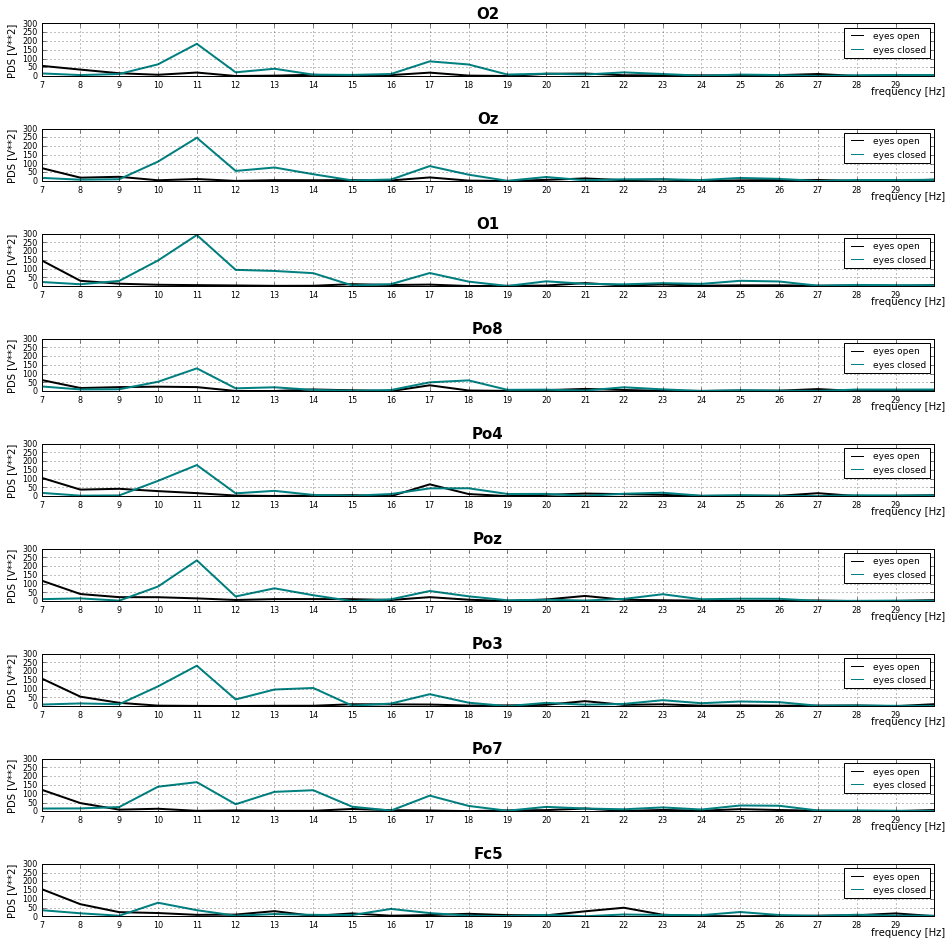

In [26]:
plt.figure(figsize=(16, 16))
n = 8
for i in range(n):
    idx = i+1
    plt.subplot((n+1)*100+10+idx)
    plt.subplots_adjust(hspace=1)
    f1,Pxx_den1 = signal.periodogram(eyes_open[-idx-1], 160,'hamming', 160, scaling = 'spectrum', axis = 0)
    plt.plot(f1, np.transpose(Pxx_den1), color = (0,0,0,1), linewidth = 2)
    f2,Pxx_den2 = signal.periodogram(eyes_closed[-idx-1], 160,'hamming', 160, scaling = 'spectrum', axis = 0)
    plt.plot(f2, np.transpose(Pxx_den2), color = (0,.5,.5,1), linewidth = 2)
    # legend
    eo = mlines.Line2D([], [], color= (0,0,0,1), marker='_', markersize=0, label='eyes open')
    ec = mlines.Line2D([], [], color= (0,.5,.5,1), marker='_', markersize=0, label='eyes closed')
    plt.legend(handles=[eo, ec], prop={'size': 9})
    
    plt.ylabel('PDS [V**2]')
    plt.xlim(7,30)
    plt.ylim(0,300)
    plt.xlabel('frequency [Hz]')
    ax = plt.gca() 
    ax.xaxis.set_label_coords(.97, -0.2) 
    ax.xaxis.labelpad = 0
    plt.xticks(list(range(7,30)))
    plt.tick_params(labelsize=8)
    plt.title(olabels[-idx-1], fontsize=15, fontweight='bold')
    plt.grid()

k = 0
plt.subplot((n+1)*100+10+(n+1))
plt.subplots_adjust(hspace=1)
f1,Pxx_den1 = signal.periodogram(eyes_open[k], 160,'hamming', 160, scaling = 'spectrum', axis = 0)
plt.plot(f1, np.transpose(Pxx_den1), color = (0,0,0,1), linewidth = 2)
f2,Pxx_den2 = signal.periodogram(eyes_closed[k], 160,'hamming', 160, scaling = 'spectrum', axis = 0)
plt.plot(f2, np.transpose(Pxx_den2), color = (0,.5,.5,1), linewidth = 2)
# legend
eo = mlines.Line2D([], [], color= (0,0,0,1), marker='_', markersize=0, label='eyes open')
ec = mlines.Line2D([], [], color= (0,.5,.5,1), marker='_', markersize=0, label='eyes closed')
plt.legend(handles=[eo, ec], prop={'size': 9})

plt.ylabel('PDS [V**2]')
plt.xlim(7,30)
plt.ylim(0,300)
plt.xlabel('frequency [Hz]')
ax = plt.gca() 
ax.xaxis.set_label_coords(.97, -0.2) 
ax.xaxis.labelpad = 0
plt.xticks(list(range(7,30)))
plt.tick_params(labelsize=8)
plt.title(olabels[k], fontsize=15, fontweight='bold')
plt.grid()

#plt.savefig('D:/DataScience/BI/HW03/1-periodogramO2Fc5.eps')
plt.savefig('D:/DataScience/BI/HW03/1-periodogram.png')
plt.show()

# welch

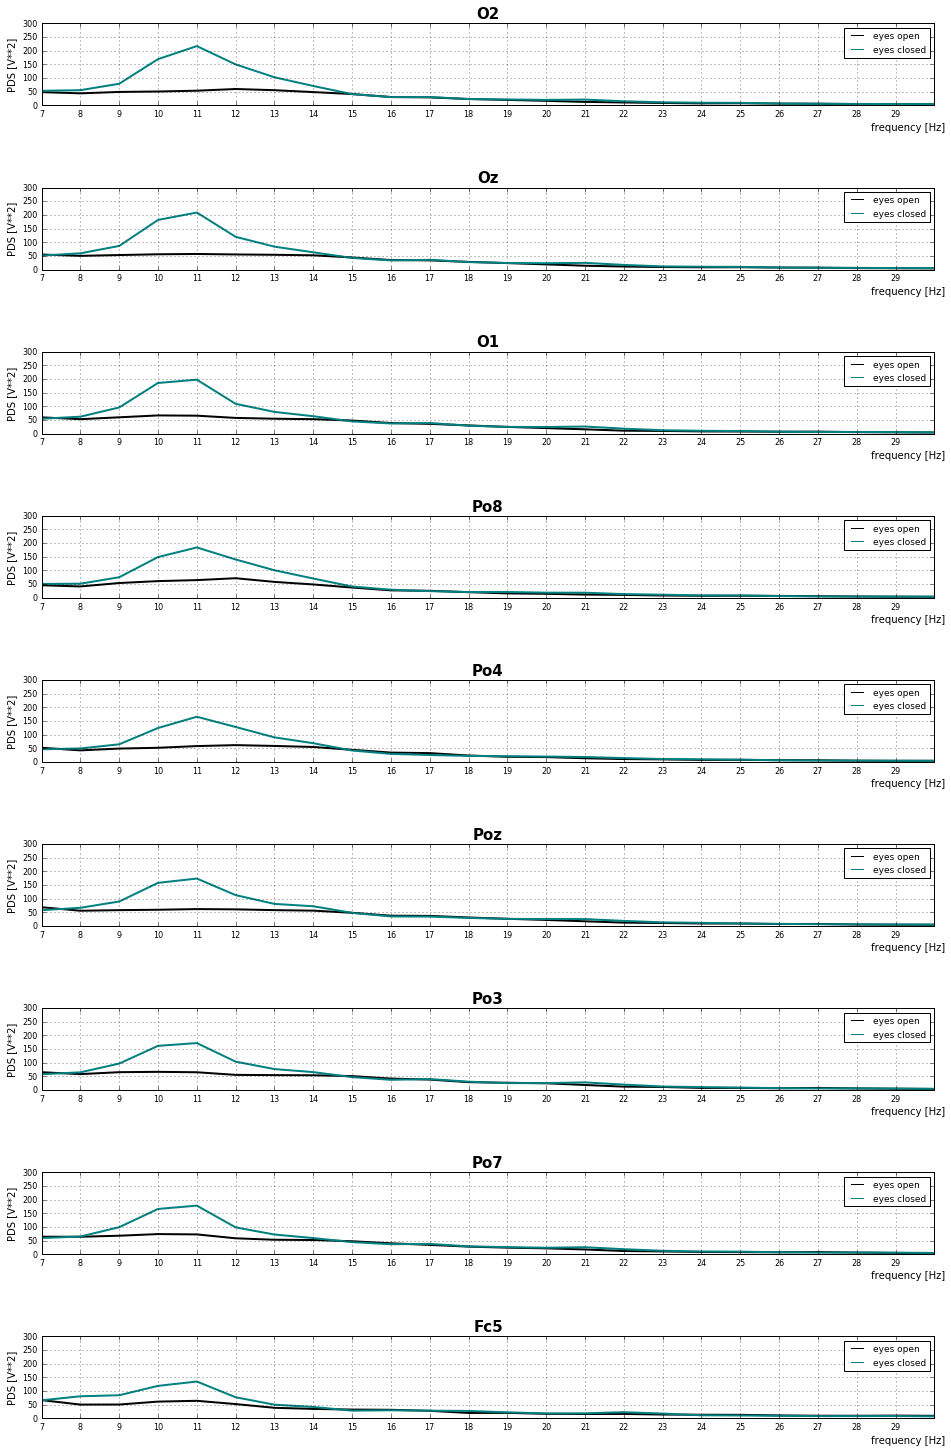

In [10]:
plt.figure(figsize=(16, 25))
n = 8
for i in range(n):
    idx = i+1
    plt.subplot((n+1)*100+10+idx)
    plt.subplots_adjust(hspace=1)
    f1,Pxx_den1 = signal.welch(eyes_open[-idx-1], 160, 'hamming', 160, scaling = 'spectrum', axis = 0)
    plt.plot(f1, np.transpose(Pxx_den1), color = (0,0,0,1), linewidth = 2)
    f2,Pxx_den2 = signal.welch(eyes_closed[-idx-1], 160,'hamming', 160, scaling = 'spectrum', axis = 0)
    plt.plot(f2, np.transpose(Pxx_den2), color = (0,.5,.5,1), linewidth = 2)
    # legend
    eo = mlines.Line2D([], [], color= (0,0,0,1), marker='_', markersize=0, label='eyes open')
    ec = mlines.Line2D([], [], color= (0,.5,.5,1), marker='_', markersize=0, label='eyes closed')
    plt.legend(handles=[eo, ec], prop={'size': 9})
    
    plt.ylabel('PDS [V**2]')
    plt.xlim(7,30)
    plt.ylim(0,300)
    plt.xlabel('frequency [Hz]')
    ax = plt.gca() 
    ax.xaxis.set_label_coords(.97, -0.2) 
    ax.xaxis.labelpad = 0
    plt.xticks(list(range(7,30)))
    plt.tick_params(labelsize=8)
    plt.title(olabels[-idx-1], fontsize=15, fontweight='bold')
    plt.grid()

plt.subplot((n+1)*100+10+(n+1))
plt.subplots_adjust(hspace=1)
f1,Pxx_den1 = signal.welch(eyes_open[k], 160, 'hamming', 160, scaling = 'spectrum', axis = 0)
plt.plot(f1, np.transpose(Pxx_den1), color = (0,0,0,1), linewidth = 2)
f2,Pxx_den2 = signal.welch(eyes_closed[k], 160,'hamming', 160, scaling = 'spectrum', axis = 0)
plt.plot(f2, np.transpose(Pxx_den2), color = (0,.5,.5,1), linewidth = 2)
# legend
eo = mlines.Line2D([], [], color= (0,0,0,1), marker='_', markersize=0, label='eyes open')
ec = mlines.Line2D([], [], color= (0,.5,.5,1), marker='_', markersize=0, label='eyes closed')
plt.legend(handles=[eo, ec], prop={'size': 9})

plt.ylabel('PDS [V**2]')
plt.xlim(7,30)
plt.ylim(0,300)
plt.xlabel('frequency [Hz]')
ax = plt.gca() 
ax.xaxis.set_label_coords(.97, -0.2) 
ax.xaxis.labelpad = 0
plt.xticks(list(range(7,30)))
plt.tick_params(labelsize=8)
plt.title(olabels[k], fontsize=15, fontweight='bold')
plt.grid()
    
plt.savefig('D:/DataScience/BI/HW03/1-welch.png')
plt.show()

# correlation

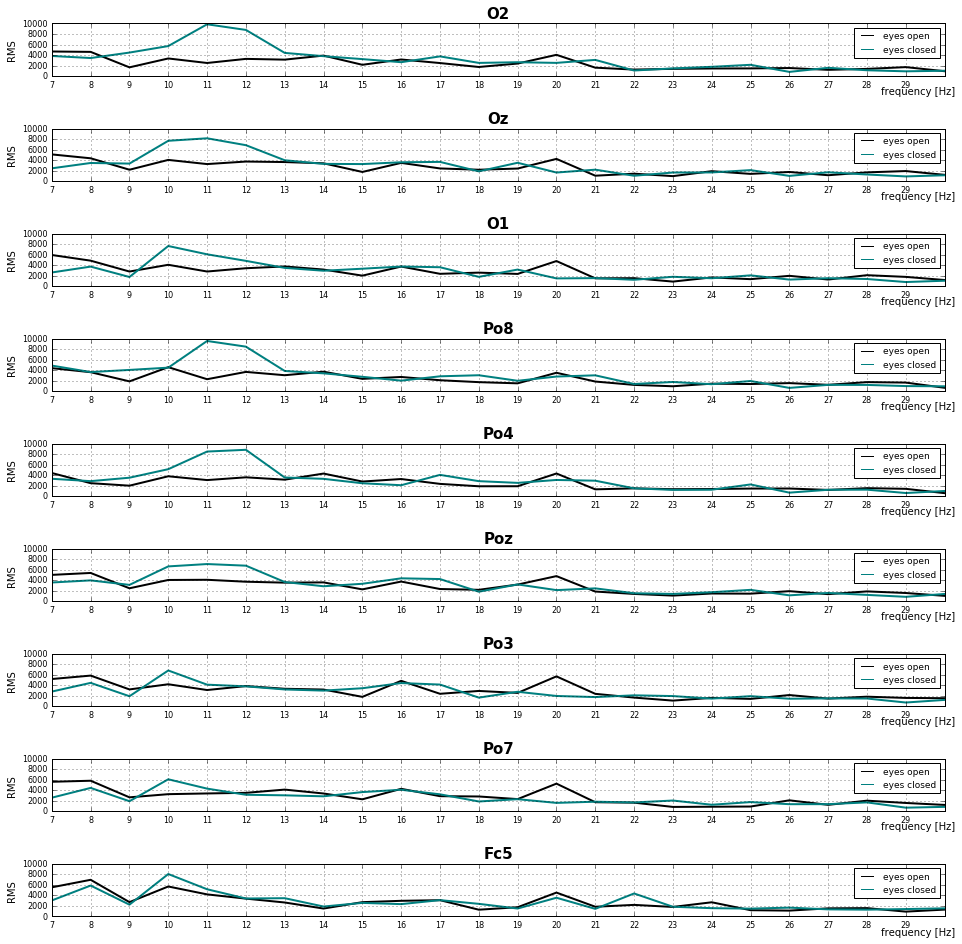

In [11]:
plt.figure(figsize=(16, 16))
n = 9
idxs = list(reversed(list(range(-n,-1))))+[k]
for i in range(n):
    orms = []
    crms = []
    freqs = list(range(7,31))
    for freq in freqs:
        basis_signal = np.cos(2*np.pi*freq*t)
        ocorr = signal.correlate(eyes_open[idxs[i]], basis_signal)
        orms += [np.sqrt(sum(ocorr**2) / len(t))]
        ccorr = signal.correlate(eyes_closed[idxs[i]], basis_signal)
        crms += [np.sqrt(sum(ccorr**2) / len(t))]
    plt.subplot(n*100+10+(i+1))
    plt.subplots_adjust(hspace=1)
    plt.plot(freqs, orms, color = (0,0,0,1), linewidth = 2)
    plt.plot(freqs, crms, color = (0,.5,.5,1), linewidth = 2)
    # legend
    eo = mlines.Line2D([], [], color= (0,0,0,1), marker='_', markersize=0, label='eyes open')
    ec = mlines.Line2D([], [], color= (0,.5,.5,1), marker='_', markersize=0, label='eyes closed')
    plt.legend(handles=[eo, ec], prop={'size': 9})
    
    plt.ylabel('RMS')
    plt.xlim(7,30)
    plt.ylim(0,10000)
    plt.xlabel('frequency [Hz]')
    ax = plt.gca() 
    ax.xaxis.set_label_coords(.97, -0.2) 
    ax.xaxis.labelpad = 0
    plt.xticks(list(range(7,30)))
    plt.tick_params(labelsize=8)
    plt.title(olabels[idxs[i]], fontsize=15, fontweight='bold')
    plt.grid()

plt.savefig('D:/DataScience/BI/HW03/1-correlation.eps')
plt.savefig('D:/DataScience/BI/HW03/1-correlation.png')
plt.show()

# yule walker

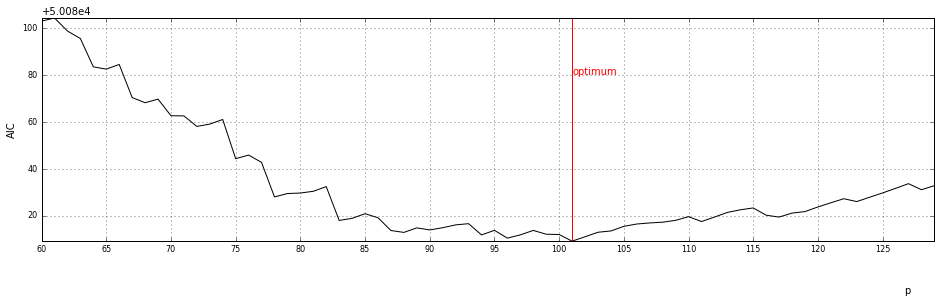

In [12]:
from spectrum import *
from pylab import *

plt.figure(figsize=(16, 4))
order = arange(60, 130,1)
rho = [aryule(eyes_open[-2], i)[1] for i in order]
score = AIC(len(eyes_open[-2]), rho, order)
plot(order, score, label='AIC', color = (0,0,0,1))
opt = list(order)[np.argmin(score)]
plt.plot([opt]*2,[0,51000], color = (1,0,0,1))
plt.xticks(list(arange(min(order),max(order),5)))
plt.xlim(min(order),max(order))
plt.xlabel('p')
plt.ylabel('AIC')
ax = plt.gca() 
ax.xaxis.set_label_coords(.97, -0.2) 
ax.xaxis.labelpad = 0
plt.tick_params(labelsize=8)
plt.ylim(min(score),max(score))
plt.text(101,50160,'optimum', color = (1,0,0,1))
plt.grid()
plt.savefig('D:/DataScience/BI/HW03/1-yluearAIC.eps')
plt.savefig('D:/DataScience/BI/HW03/1-yluearAIC.png')
plt.show()

In [13]:
opt

101

# 1.3. (class ‘C’) Compare different choices of estimation parameters.

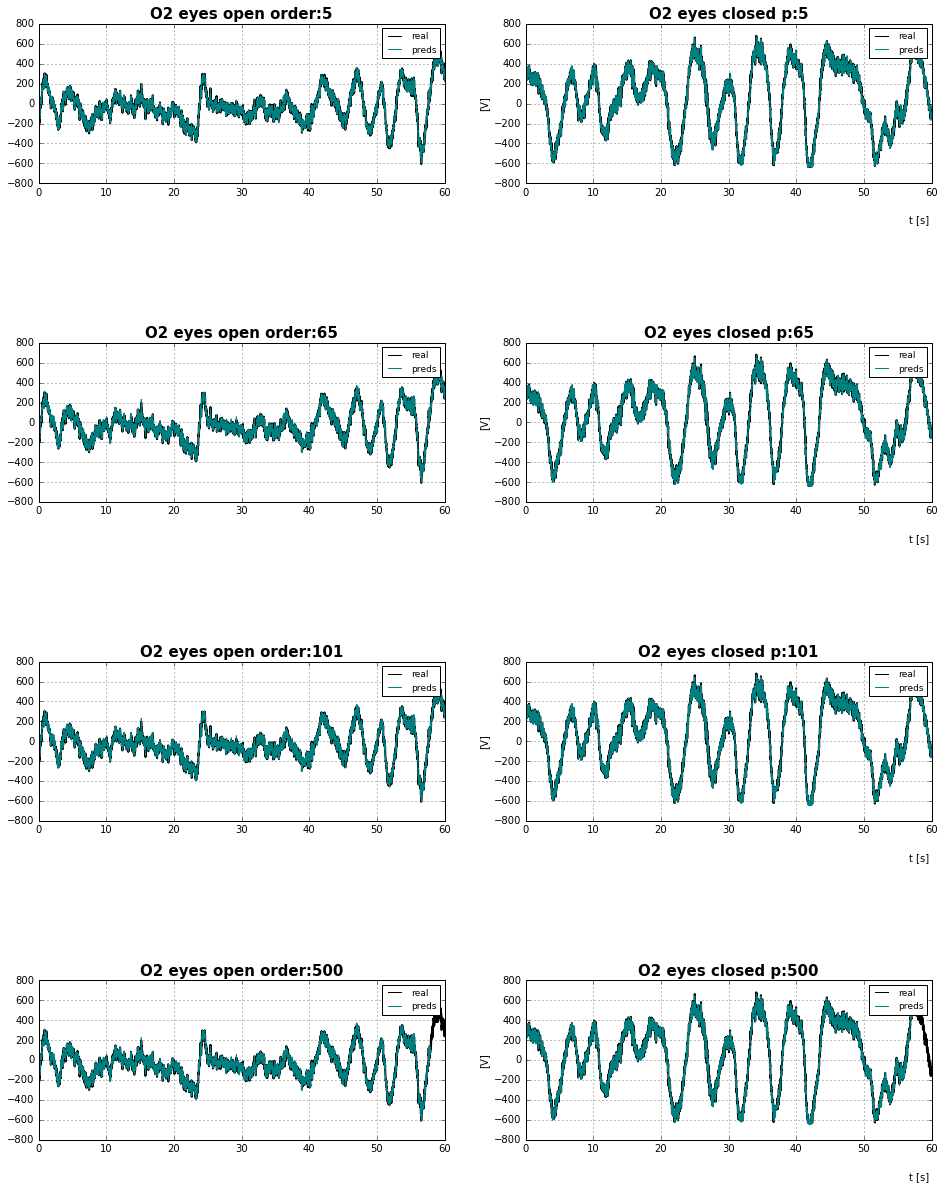

In [14]:
plt.figure(figsize=(16, 20))

order = [5,65,101,500]
idx = 1
V = []
for p in order:
    
    plt.subplot(len(order)*100+20+idx)
    idx +=1
    plt.subplots_adjust(hspace=1)
    a, v, k = aryule(eyes_open[-2], p)
    V += [v]
    xhat = [sum(eyes_open[-2][i:(i+p)]*-a)for i in range(len(eyes_open[-2][p:]))]
    plt.plot(t,eyes_open[-2], color = (0,0,0,1), linewidth = 2)
    plt.plot(t[:-p],xhat, color = (0,.5,.5,1), linewidth = 1)
    plt.xlim(0,60)
    plt.ylim(-800,800)

    # legend
    l1 = mlines.Line2D([], [], color = (0,0,0,1), marker = '_', markersize = 0, label = 'real')
    l2 = mlines.Line2D([], [], color = (0,.5,.5,1), marker = '_', markersize = 0, label = 'preds')
    plt.legend(handles = [l1, l2], prop = {'size': 9})
    
    ax = plt.gca() 
    ax.xaxis.set_label_coords(.97, -0.2) 
    ax.xaxis.labelpad = 0
    #plt.xticks(list(range(7,30)))
    #plt.tick_params(labelsize=8)
    plt.title(olabels[-2]+' eyes open order:'+str(p), fontsize=15, fontweight='bold')
    plt.grid()
    
    plt.subplot(len(order)*100+20+idx)
    idx += 1
    plt.subplots_adjust(hspace=1)
    a, v, k = aryule(eyes_closed[-2], p)
    xhat = [sum(-a*eyes_closed[-2][i:(i+p)])for i in range(len(eyes_closed[-2][p:]))]
    plt.plot(t, eyes_closed[-2], color = (0,0,0,1), linewidth = 2)
    plt.plot(t[:-p], xhat, color = (0,.5,.5,1), linewidth = 1)
    plt.xlim(0,60)
    plt.ylim(-800,800)

    # legend
    l1 = mlines.Line2D([], [], color = (0,0,0,1), marker = '_', markersize = 0, label = 'real')
    l2 = mlines.Line2D([], [], color = (0,.5,.5,1), marker = '_', markersize = 0, label = 'preds')
    plt.legend(handles = [l1, l2], prop = {'size': 9})
    
    plt.xlabel('t [s]')
    plt.ylabel('[V]')
    ax = plt.gca() 
    ax.xaxis.set_label_coords(.97, -0.2) 
    ax.xaxis.labelpad = 0
    #plt.xticks(list(range(7,30)))
    #plt.tick_params(labelsize=8)
    plt.title(clabels[-2]+' eyes closed p:'+str(p), fontsize=15, fontweight='bold')
    plt.grid()
    
plt.savefig('D:/DataScience/BI/HW03/1-ywpt.png')
plt.show()

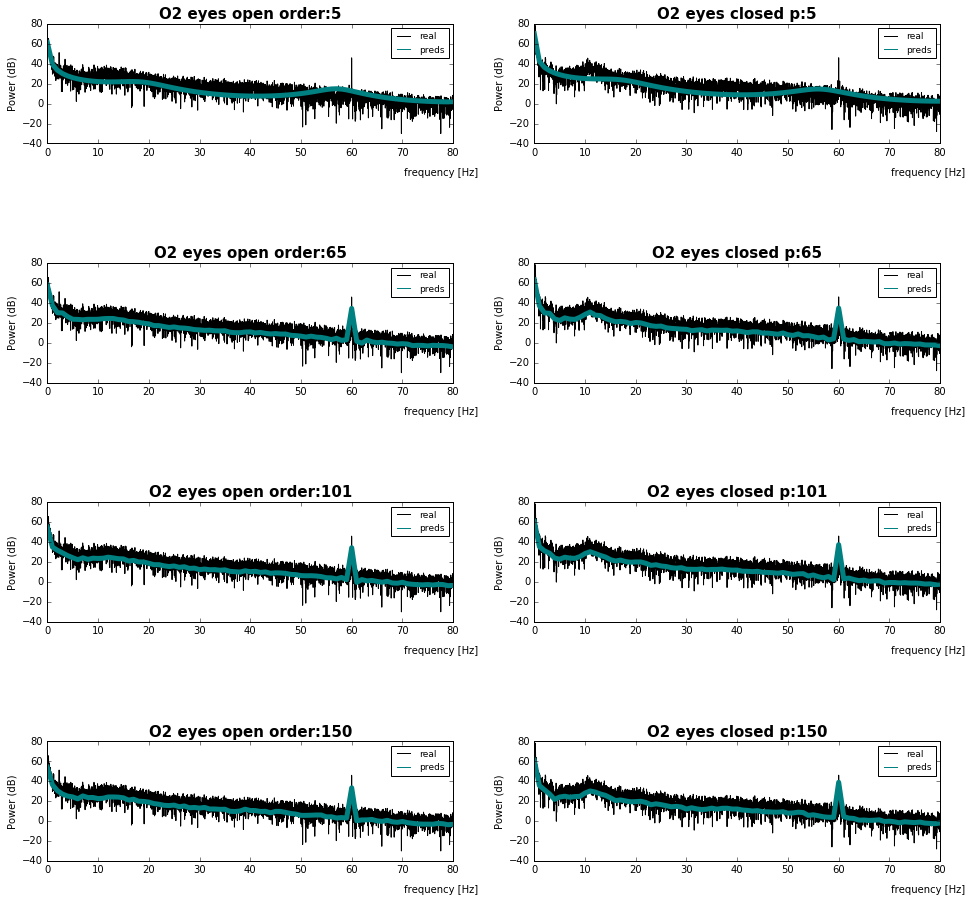

In [15]:
plt.figure(figsize=(16, 15))

order = [5,65,101,150]
idx = 1
V = []
for p in order:
    
    plt.subplot(len(order)*100+20+idx)
    idx +=1
    plt.subplots_adjust(hspace=1)
    yp = Periodogram(eyes_open[-2], sampling = 160)
    yp()
    yp.plot(color = (0,0,0,1))
    yp = pyule(eyes_open[-2], p, sampling = 160, NFFT=160, scale_by_freq=True)
    yp()
    yp.plot(color = (0,.5,.5,1), linewidth = 5)
    #plt.xlim(7,30)
    #plt.ylim(-800,800)

    # legend
    l1 = mlines.Line2D([], [], color = (0,0,0,1), marker = '_', markersize = 0, label = 'real')
    l2 = mlines.Line2D([], [], color = (0,.5,.5,1), marker = '_', markersize = 0, label = 'preds')
    plt.legend(handles = [l1, l2], prop = {'size': 9})
    
    plt.xlabel('frequency [Hz]')
    ax = plt.gca() 
    ax.xaxis.set_label_coords(.97, -0.2) 
    ax.xaxis.labelpad = 0
    #plt.xticks(list(range(7,30)))
    #plt.tick_params(labelsize=8)
    plt.title(olabels[-2]+' eyes open order:'+str(p), fontsize=15, fontweight='bold')
    plt.grid()
    
    plt.subplot(len(order)*100+20+idx)
    idx += 1
    plt.subplots_adjust(hspace=1)
    yp = Periodogram(eyes_closed[-2], sampling = 160)
    yp()
    yp.plot(color = (0,0,0,1))
    yp = pyule(eyes_closed[-2], p, sampling=160, NFFT=160, scale_by_freq=True)
    yp()
    yp.plot(color = (0,.5,.5,1), linewidth = 5)
    #plt.xlim(7,30)
    #plt.ylim(-800,800)

    # legend
    l1 = mlines.Line2D([], [], color = (0,0,0,1), marker = '_', markersize = 0, label = 'real')
    l2 = mlines.Line2D([], [], color = (0,.5,.5,1), marker = '_', markersize = 0, label = 'preds')
    plt.legend(handles = [l1, l2], prop = {'size': 9})
    
    plt.xlabel('frequency [Hz]')
    ax = plt.gca() 
    ax.xaxis.set_label_coords(.97, -0.2) 
    ax.xaxis.labelpad = 0
    #plt.xticks(list(range(7,30)))
    #plt.tick_params(labelsize=8)
    plt.title(clabels[-2]+' eyes closed p:'+str(p), fontsize=15, fontweight='bold')
    plt.grid()
    
plt.savefig('D:/DataScience/BI/HW03/1-ywp.eps') # formato vettoriale
plt.savefig('D:/DataScience/BI/HW03/1-ywp.png') 
plt.show()

# 1.4. (class ‘D’) Make a multivariate comparison of PSDs, considering simultaneously two independent variables (channels resting state).

In [ ]:
import connectivipy as cp
p = cp.Mvar.order_akaike(eyes_open[-3:-1])[0]
print('order:',p)

In [ ]:
plt.figure(figsize=(16, 16))

order = [1,3,5,50]
idx = 1

for p in order:
    # eyes open
    #X = eyes_open[:-1]
    #X = eyes_open[-3:-1] # Oz-O2
    #X = np.array([eyes_open[0],eyes_open[-2]]) # Fc5-O2
    X = np.array([eyes_open[-2]])
    
    A, V = cp.Mvar.fit(data=X, order=p, method='yw')
    X_ohat = []
    for i in range(X.shape[0]): X_ohat += [np.sum([np.dot(A[pp][i],X) for pp in range(p)],0)]
        
    # eyes closed
    #X = eyes_closed[:-1]
    #X = eyes_closed[-3:-1] # Oz-O2
    X = np.array([eyes_closed[0],eyes_closed[-2]]) # Fc5-O2

    A, V = cp.Mvar.fit(data=X, order=p, method='yw')
    X_chat = []
    for i in range(X.shape[0]): X_chat += [np.sum([np.dot(A[pp][i],X) for pp in range(p)],0)]
    
    plt.subplot(len(order)*100+20+idx)
    idx +=1
    plt.subplots_adjust(hspace=1)
    #eo = np.std(eyes_open[-2]-X_ohat[-2])
    f1,Pxx_den1 = signal.periodogram(eyes_open[-2], 160,'hamming', 160, scaling = 'spectrum', axis = 0)
    plt.plot(f1, np.transpose(Pxx_den1), color = (0,0,0,1), linewidth = 2)
    fh1,Pxx_denh1 = signal.periodogram(X_ohat[-1], 160,'hamming', 160, scaling = 'spectrum', axis = 0)
    plt.plot(fh1, np.transpose(Pxx_denh1), color = (0,.5,.5,1), linewidth = 2)
    #plt.plot(fh1, np.transpose(Pxx_denh1)+stats.norm.ppf(0.995,0,eo), linestyle = '--', color = (1,0,0,1), linewidth = 1) # 95%
    #plt.plot(fh1, np.transpose(Pxx_denh1)-stats.norm.ppf(0.995,0,eo), linestyle = '--', color = (1,0,0,1), linewidth = 1)
    plt.xlim(7,30)
    plt.ylim(0,200)

    # legend
    l1 = mlines.Line2D([], [], color = (0,0,0,1), marker = '_', markersize = 0, label = 'real')
    l2 = mlines.Line2D([], [], color = (0,.5,.5,1), marker = '_', markersize = 0, label = 'preds')
    plt.legend(handles = [l1, l2], prop = {'size': 9})
    
    plt.xlabel('frequency [Hz]')
    ax = plt.gca() 
    ax.xaxis.set_label_coords(.97, -0.2) 
    ax.xaxis.labelpad = 0
    plt.xticks(list(range(7,30)))
    plt.tick_params(labelsize=8)
    plt.title(olabels[-2]+' eyes open order:'+str(p), fontsize=15, fontweight='bold')
    #plt.text(28,30,'95%', color = (1,0,0,1))
    plt.grid()
    
    plt.subplot(len(order)*100+20+idx)
    idx += 1
    plt.subplots_adjust(hspace=1)
    #ec = np.std(eyes_closed[-2]-X_chat[-2])
    f2,Pxx_den2 = signal.periodogram(eyes_closed[-2], 160,'hamming', 160, scaling = 'spectrum', axis = 0)
    plt.plot(f2, np.transpose(Pxx_den2), color = (0,0,0,1), linewidth = 2)
    fh2,Pxx_denh2 = signal.periodogram(X_chat[-1], 160,'hamming', 160, scaling = 'spectrum', axis = 0)
    plt.plot(fh2, np.transpose(Pxx_denh2), color = (0,.5,.5,1), linewidth = 2)
    #plt.plot(fh2, np.transpose(Pxx_denh2)+stats.norm.ppf(0.975,0,ec), linestyle = '--', color = (1,0,0,1), linewidth = 1)
    #plt.plot(fh2, np.transpose(Pxx_denh2)-stats.norm.ppf(0.975,0,ec), linestyle = '--', color = (1,0,0,1), linewidth = 1)
    plt.xlim(7,30)
    plt.ylim(0,200)

    # legend
    l1 = mlines.Line2D([], [], color = (0,0,0,1), marker = '_', markersize = 0, label = 'real')
    l2 = mlines.Line2D([], [], color = (0,.5,.5,1), marker = '_', markersize = 0, label = 'preds')
    plt.legend(handles = [l1, l2], prop = {'size': 9})
    
    plt.xlabel('frequency [Hz]')
    ax = plt.gca() 
    ax.xaxis.set_label_coords(.97, -0.2) 
    ax.xaxis.labelpad = 0
    plt.xticks(list(range(7,30)))
    plt.tick_params(labelsize=8)
    plt.title(clabels[-2]+' eyes closed order:'+str(p), fontsize=15, fontweight='bold')
    #plt.text(28,30,'95%', color = (1,0,0,1))
    plt.grid()
    
plt.savefig('D:/DataScience/BI/HW03/1-2Mvar.eps') # formato vettoriale
plt.show()

In [ ]:
plt.figure(figsize=(16, 5))
p = 5
X = np.array([eyes_open[0],eyes_open[-2]])
A, V = cp.Mvar.fit(data=X, order=p, method='yw')
X_ohat = []
for i in range(X.shape[0]): X_ohat += [np.sum([np.dot(A[pp][i],X) for pp in range(p)],0)]
plt.plot(X_ohat[-1], color = (0,0,0,1))
plt.plot(eyes_open[-2], color = (1,0,0,1))
plt.show()

In [ ]:
olabels[-3]

In [ ]:
X = np.array([eyes_open[-2]])

a, v = cp.Mvar.fit(data=X, order=p, method='yw')
A,H,S = cp.conn.spectrum(a, v, fs=160, resolution=80)
plt.plot(list(range(80)),np.absolute(np.transpose(H)[0][0]))
plt.ylim(0,50)
plt.xlim(7,30)
plt.show()
np.absolute(S)
len(list(range(81)))
len(np.transpose(S[0][0]))

In [ ]:
X = eyes_open

a, v = cp.Mvar.fit(data=X, order=2, method='yw')
A,H,S = cp.conn.spectrum(a, v, fs=160, resolution=80)

cp.plot_conn(A, fs=160)

In [ ]:
plt.figure(figsize=(16, 16))

order = [1,3,5,50]
idx = 1

for p in order:
    # eyes open
    #X = eyes_open[:-1]
    #X = eyes_open[-3:-1] # Oz-O2
    #X = np.array([eyes_open[0],eyes_open[-2]]) # Fc5-O2
    X = np.array([eyes_open[-2]])
    
    a, v = cp.Mvar.fit(data=X, order=p, method='yw')
    A,H,S = connectivipy.conn.spectrum(a, v, fs=160, resolution=80)
    X_ohat = []
    for i in range(X.shape[0]): X_ohat += [np.sum([np.dot(A[pp][i],X) for pp in range(p)],0)]
        
    # eyes closed
    #X = eyes_closed[:-1]
    #X = eyes_closed[-3:-1] # Oz-O2
    X = np.array([eyes_closed[0],eyes_closed[-2]]) # Fc5-O2

    A, V = cp.Mvar.fit(data=X, order=p, method='yw')
    X_chat = []
    for i in range(X.shape[0]): X_chat += [np.sum([np.dot(A[pp][i],X) for pp in range(p)],0)]
    
    plt.subplot(len(order)*100+20+idx)
    idx +=1
    plt.subplots_adjust(hspace=1)
    #eo = np.std(eyes_open[-2]-X_ohat[-2])
    f1,Pxx_den1 = signal.periodogram(eyes_open[-2], 160,'hamming', 160, scaling = 'spectrum', axis = 0)
    plt.plot(f1, np.transpose(10*np.log(Pxx_den1)), color = (0,0,0,1), linewidth = 2)
    fh1,Pxx_denh1 = signal.periodogram(X_ohat[-1], 160,'hamming', 160, scaling = 'spectrum', axis = 0)
    plt.plot(fh1, np.transpose(10*np.log(Pxx_denh1)), color = (0,.5,.5,1), linewidth = 2)
    #plt.plot(fh1, np.transpose(Pxx_denh1)+stats.norm.ppf(0.995,0,eo), linestyle = '--', color = (1,0,0,1), linewidth = 1) # 95%
    #plt.plot(fh1, np.transpose(Pxx_denh1)-stats.norm.ppf(0.995,0,eo), linestyle = '--', color = (1,0,0,1), linewidth = 1)
    #plt.xlim(7,30)
    #plt.ylim(0,200)

    # legend
    l1 = mlines.Line2D([], [], color = (0,0,0,1), marker = '_', markersize = 0, label = 'real')
    l2 = mlines.Line2D([], [], color = (0,.5,.5,1), marker = '_', markersize = 0, label = 'preds')
    plt.legend(handles = [l1, l2], prop = {'size': 9})
    
    plt.xlabel('frequency [Hz]')
    ax = plt.gca() 
    ax.xaxis.set_label_coords(.97, -0.2) 
    ax.xaxis.labelpad = 0
    plt.xticks(list(range(7,30)))
    plt.tick_params(labelsize=8)
    plt.title(olabels[-2]+' eyes open order:'+str(p), fontsize=15, fontweight='bold')
    #plt.text(28,30,'95%', color = (1,0,0,1))
    plt.grid()
    
    plt.subplot(len(order)*100+20+idx)
    idx += 1
    plt.subplots_adjust(hspace=1)
    #ec = np.std(eyes_closed[-2]-X_chat[-2])
    f2,Pxx_den2 = signal.periodogram(eyes_closed[-2], 160,'hamming', 160, scaling = 'spectrum', axis = 0)
    plt.plot(f2, np.transpose(Pxx_den2), color = (0,0,0,1), linewidth = 2)
    fh2,Pxx_denh2 = signal.periodogram(X_chat[-1], 160,'hamming', 160, scaling = 'spectrum', axis = 0)
    plt.plot(fh2, np.transpose(Pxx_denh2), color = (0,.5,.5,1), linewidth = 2)
    #plt.plot(fh2, np.transpose(Pxx_denh2)+stats.norm.ppf(0.975,0,ec), linestyle = '--', color = (1,0,0,1), linewidth = 1)
    #plt.plot(fh2, np.transpose(Pxx_denh2)-stats.norm.ppf(0.975,0,ec), linestyle = '--', color = (1,0,0,1), linewidth = 1)
    #plt.xlim(7,30)
    #plt.ylim(0,200)

    # legend
    l1 = mlines.Line2D([], [], color = (0,0,0,1), marker = '_', markersize = 0, label = 'real')
    l2 = mlines.Line2D([], [], color = (0,.5,.5,1), marker = '_', markersize = 0, label = 'preds')
    plt.legend(handles = [l1, l2], prop = {'size': 9})
    
    plt.xlabel('frequency [Hz]')
    ax = plt.gca() 
    ax.xaxis.set_label_coords(.97, -0.2) 
    ax.xaxis.labelpad = 0
    plt.xticks(list(range(7,30)))
    plt.tick_params(labelsize=8)
    plt.title(clabels[-2]+' eyes closed order:'+str(p), fontsize=15, fontweight='bold')
    #plt.text(28,30,'95%', color = (1,0,0,1))
    plt.grid()
    
plt.savefig('D:/DataScience/BI/HW03/2Mvar.eps') # formato vettoriale
plt.show()